In [32]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt




In [62]:
fmnist = pd.read_csv (r'C:\Users\tavor\Downloads\fashion-mnist_train.csv\fashion-mnist_train.csv')

fashionMnist = pd.read_csv (r'C:\Users\tavor\Downloads\fashion-mnist_train.csv\fashion-mnist_train.csv')

In [63]:
fmnist

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fmnist.shape

(60000, 785)

In [13]:
fmnist["label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [8]:
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
def get_label_cls(label):
    """given an int label range [0,9], return the string description of that label"""
    return class_table[label]

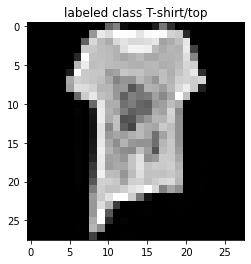

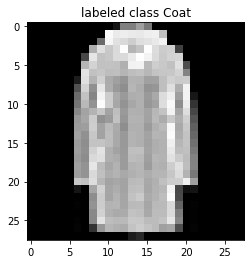

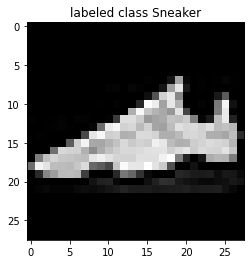

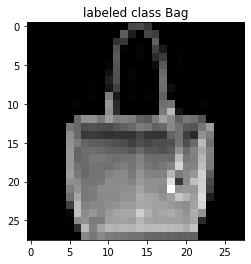

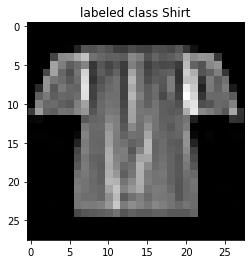

In [12]:
for i in range(5000,5005):
#for i in range(5):     
    sample = np.reshape(fmnist[fmnist.columns[1:]].iloc[i].values/255, (28,28))
    plt.figure()
    plt.title("labeled class {}".format(get_label_cls(fmnist["label"].iloc[i])))
    plt.imshow(sample, 'gray')

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
#pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [18]:
from sklearn.model_selection import train_test_split

x = fmnist.drop(["label"], axis = 1)
y = fmnist["label"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 784)
(18000, 784)
(42000,)
(18000,)


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
#pca1=PCA(n_components=0.9)
x_train_pca = pca.fit_transform(X_train)
x_train_recovered1=pca.inverse_transform(x_train_reduced1)
x_test_pca = pca.transform(X_test)
x_test_recovered1=pca.inverse_transform(x_test_reduced1)

In [37]:
x_train_reduced1

array([[-1005.7148257 ,   275.82479018,   133.41298472, ...,
          -84.48135992,   161.65193486,    15.53461486],
       [ 1796.07173845,  -367.10313234,   164.42366798, ...,
          -85.63882516,   -55.20282756,    37.88654811],
       [  113.08751772,  -317.51215247,  -865.32843696, ...,
           -3.96276516,  -115.0039493 ,   -60.17591329],
       ...,
       [ -477.36228409,  -339.61952877,  -442.72890127, ...,
          -40.03521422,    30.08533013,   -45.01124664],
       [ 1995.33636492,  1111.26514481,  -332.30375832, ...,
           50.5029802 ,   -12.20705146,  -120.86218353],
       [ 1931.06630943,  -957.44243355,   554.59464388, ...,
           89.14221633,   -40.9466196 ,   -33.61238136]])

In [38]:
im = x_train_reduced1[1,:].reshape(28,28)
plt.imshow(im)

ValueError: cannot reshape array of size 100 into shape (28,28)

In [40]:
knn1 = KNeighborsClassifier(n_neighbors=27)
knn1.fit(x_train_pca, y_train)
y_pred_knn1=knn1.predict(x_test_pca)
accuracy_knn1=metrics.accuracy_score(y_test, y_pred_knn1)
accuracy_knn1

0.8525

In [57]:
pca_after = PCA(n_components=10)
x_train_af = pca_after.fit_transform(X_train)
x_test_af = pca_after.transform(X_test)


In [58]:
knn_af = KNeighborsClassifier(n_neighbors=27)
knn1.fit(x_train_af, y_train)
y_pred_knn_af=knn1.predict(x_test_af)
accuracy_knn_af=metrics.accuracy_score(y_test, y_pred_knn_af)
accuracy_knn_af

0.8144444444444444

In [61]:
print(classification_report(y_test, y_pred_knn_af))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1807
           1       0.98      0.94      0.96      1758
           2       0.69      0.67      0.68      1818
           3       0.81      0.87      0.84      1844
           4       0.68      0.68      0.68      1827
           5       0.93      0.86      0.89      1776
           6       0.57      0.53      0.55      1761
           7       0.88      0.89      0.88      1797
           8       0.94      0.94      0.94      1774
           9       0.88      0.94      0.91      1838

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000

